In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [3]:
# use GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.ReLU(),
    nn.Linear(30, 2)
)

In [5]:
### make some random stuff
data = torch.randn(1000, 20)
labels = torch.randint(low=0,high=2,size=(1,1000))

In [6]:
### Send the model and the data to the GPU
net = net.to(device)
data = data.to(device)
labels = labels.to(device)

In [7]:
data

tensor([[ 0.9028, -0.9424, -0.4787,  ...,  0.0217, -0.1718, -1.1036],
        [-1.5171, -0.7432, -0.0201,  ..., -0.3715,  0.3845, -1.7772],
        [ 0.0638, -1.1239, -0.3073,  ...,  1.4090,  2.1491,  0.4820],
        ...,
        [ 1.0759,  0.6869,  1.1472,  ..., -0.3549, -0.0041,  1.5994],
        [ 1.1145, -0.4519, -0.7756,  ..., -0.6313,  0.4533,  0.4503],
        [ 1.5830, -1.8863, -0.4495,  ...,  0.4709, -0.7956,  0.6428]],
       device='cuda:0')

In [8]:
dataG = torch.randn((1000, 20),device=device)
dataC = torch.randn((1000,20), device='cpu')


In [9]:
output = net(data)

In [10]:
output.device

device(type='cuda', index=0)

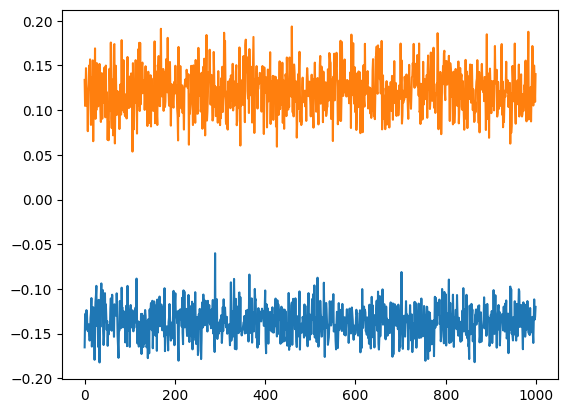

In [12]:
# plt.plot(output.detach());

plt.plot(output.cpu().detach());

In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [14]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [15]:
[CPUtime,GPUtime]


[8.000413000001316, 3.054067000000771]